## Shapefiles

In [1]:
#!pip install geopandas

In [2]:
import geopandas

In [3]:
df = geopandas.read_file("global_tectonics/polygon_data/GSHHS_I_L1.shp")

In [4]:
africa = df[df.id == '1']
africa_poly = africa.geometry.iloc[0]

In [5]:
coords = list(africa_poly.exterior.coords)

<AxesSubplot:>

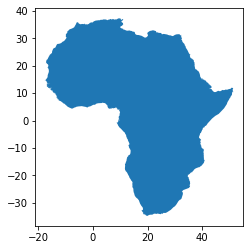

In [6]:
africa.plot()

## Step 1: Convert to stereographic coordinates

In [7]:
from pyproj import Proj
to_stereographic = Proj("+proj=stere +lat_0=90 +R=1.0 +lat_ts=0")

In [8]:
import numpy as np

coords_lon_lat_degrees = np.array(coords)


In [9]:
coords_stereographic_x, coords_stereographic_y = to_stereographic(
                                                        coords_lon_lat_degrees[:,0], 
                                                        coords_lon_lat_degrees[:,1])

In [10]:
coords_stereographic = np.zeros_like(coords)
coords_stereographic[:, 0] = coords_stereographic_x
coords_stereographic[:, 1] = coords_stereographic_y

## GMSH Polar Sphere

In [11]:
import gmsh

In [12]:
gmsh.initialize()

In [13]:
gmsh.model.add("Earth")

In [14]:
sphere = gmsh.model.geo.add_geometry('PolarSphere', [0., 0., 0., 1.0])

### Add points



In [15]:
point_tags = []

# Here we account for the fact that, in a polygon shapefile, the first and
# last node of a polygon are the same.
for index in range(len(coords_stereographic) - 1):
    x = coords_stereographic[index, 0]
    y = coords_stereographic[index, 1]
    tag = gmsh.model.geo.add_point_on_geometry(sphere, x, y)
    point_tags.append(tag)

In [16]:
point_tags = point_tags + [point_tags[0]]

### Add lines

In [17]:
line_tags = []

for index in range(len(point_tags) - 1):
    pt1, pt2 = point_tags[index], point_tags[index + 1]
    tag = gmsh.model.geo.add_line(pt1, pt2)
    line_tags.append(tag)

### Add Curved Loop and define surface

In [18]:
cl1 = gmsh.model.geo.add_curve_loop(line_tags)

In [19]:
gmsh.model.geo.add_plane_surface([cl1])

1

In [20]:
gmsh.model.geo.synchronize()

### Adapt the mesh

In [21]:
gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "CurvesList", [d[1] for d in gmsh.model.getEntities(1)])


gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "InField", 1)
gmsh.model.mesh.field.setNumber(2, "SizeMin", 0.01)
gmsh.model.mesh.field.setNumber(2, "SizeMax", 0.1)
gmsh.model.mesh.field.setNumber(2, "DistMin", 0.01)
gmsh.model.mesh.field.setNumber(2, "DistMax", 0.2)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

In [22]:
gmsh.option.setNumber("Mesh.MeshSizeExtendFromBoundary", 0)

In [23]:
gmsh.model.mesh.generate(2)

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 10%] Meshing curve 6 (Line)
Info    : [ 10%] Meshing curve 7 (Line)
Info    : [ 10%] Meshing curve 8 (Line)
Info    : [ 10%] Meshing curve 9 (Line)
Info    : [ 10%] Meshing curve 10 (Line)
Info    : [ 10%] Meshing curve 11 (Line)
Info    : [ 10%] Meshing curve 12 (Line)
Info    : [ 10%] Meshing curve 13 (Line)
Info    : [ 10%] Meshing curve 14 (Line)
Info    : [ 10%] Meshing curve 15 (Line)
Info    : [ 10%] Meshing curve 16 (Line)
Info    : [ 10%] Meshing curve 17 (Line)
Info    : [ 10%] Meshing curve 18 (Line)
Info    : [ 10%] Meshing curve 19 (Line)
Info    : [ 10%] Meshing curve 20 (Line)
Info    : [ 10%] Meshing curve 21 (Line)
Info    : [ 10%] Meshing curve 22 (Line)
Info    : [ 10%] Meshing curve 23 (Line)
Info    : [ 10%] Meshing curve 24 (Line)
I

In [ ]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.10.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 20220501
Build host    : gmsh.info
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blas[petsc] Blossom Cgns DIntegration Dlopen DomHex Eigen[contrib] Fltk Gmm[contrib] Hxt Jpeg Kbipack Lapack[petsc] LinuxJoystick MathEx[contrib] Med Mesh Metis[contrib] Mmg Mpeg Netgen ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom PETSc Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.4.0
PETSc version : 3.14.4 (real arithmtic)
OCC version   : 7.6.1
MED version   : 4.1.0
Packaged by   : geuzaine
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------
